# M2_AI2: Gestión de facturas
#### Autor: Leandro Gutierrez
#### Este documento intenta dar respuesta a la actividad 2 propuesta en el Modulo **Fundamentos de Estadística** del **Master en Big Data y Ciencia de Datos**. En él se describirán cada uno de los enunciados postulados y los resultados obtenidos a través del uso de la base de datos relacional Oracle y su interfaz SQL.
#### Junio 12, 2024

## Enunciado
El objetivo de esta actividad consiste en identificar y analizar el total pagado de un dataset de facturas que tiene una compañía. La moneda está en euros.

IMPORTANTE: LA OBTENCIÓN DE LOS RESULTADOS (el dato numérico y el código) SIN LOS COMENTARIOS Y LA JUSTIFICACIÓN ANALÍTICA. NO PUNTÚA NOTA

Con el dataset de la gestión de facturas, debes analizar la variable “total pagado” para poder responder a las siguientes preguntas:

- Parte1: Unidimensional (50%)
1. Hallar las medidas de centralización: media, mediana y moda. Analiza los resultados obtenidos.  
2. Las medidas de dispersión: rango, varianza, desviación típica y coeficiente de variación. Analiza los resultados obtenidos. 
3. Las medidas de posición: rango intercuartílico, cuartil primero y percentil 90. Analiza los resultados obtenidos. 
4. Las medidas de concentración y forma: curtosis, asimetría y el gráfico asociado. Analiza los resultados obtenidos. 
5. Realiza un análisis de todos los datos obtenidos en los apartados anteriores y añade un gráfico de box-plot explicando los resultados.

- Parte2: Análisis de la información de la empresa y su situación  (20%)
1. ANALIZA los resultados e informa de quién es el cliente que ha pagado MÁS en todas las facturas.
2. ANALIZA los resultados e informa de quién es el cliente que ha pagado MENOS facturas en el mes de febrero.
3. Añadir un gráfico de box-plot de los clientes. Conclusiones y recomendaciones después de todo el análisis realizado.


- Parte3: Análisis Bidimensional (15%)
1. Crea un gráfico de dispersión que represente el total pagado de las facturas respecto del IVA aplicado. Explica el resultado obtenido.
2. Determina el valor de la covarianza de ambas variables. Analiza el dato resultante obtenido.
3. ¿Se podría hacer un modelo predictivo? ¿porque?


- Parte 4: Análisis Global. (15%)
1. ANALIZA toda la información obtenida. ¿Cuál sería la recomendación que darías para la toma de decisión en la compañía?

## Solución

### Diccionario de datos

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
    <td>id</td>
    <td>Identificador correlativo y secuencial del número de registros de facturas.</td>
    <td></td>
</tr>
<tr>
    <td>fecha</td>
    <td>Fecha en la que se generó la factura.</td>
    <td></td>
</tr>
<tr>
    <td>mes</td>
    <td>Mes en la que se generó la factura</td>
    <td></td>
</tr>
<tr>
    <td>cliente</td>
    <td>Tipo de cliente, clasificado de la A a la D</td>
    <td>ClienteA - ClienteB - ClienteC - ClienteD</td>
</tr>
<tr>
    <td>factura_pagada</td>
    <td>Descriptivo de si está pagada o no, en la fecha de generación.</td>
    <td>si - no</td>
</tr>
<tr>
    <td>importe_factura</td>
    <td>Importe neto sin el IVA.</td>
    <td></td>
</tr>
<tr>
    <td>tio_IVA</td>
    <td>Es el tipo de impuesto aplicado (descriptivo).</td>
    <td>normal - reducido</td>
</tr>
<tr>
    <td>porcentaje_IVA</td>
    <td>Es el porcentaje aplicado.</td>
    <td></td>
</tr>
<tr>
    <td>IVA</td>
    <td>Es el valor numérico del porcentaje correspondiente a la factura.</td>
    <td></td>
</tr>
<tr>
    <td>total_pagado</td>
    <td>es el importe bruto de la factura (el neto más el importe IVA).</td>
    <td></td>
</tr>
</tbody>
</table>


### Carga del dataset

In [40]:
# importando librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# definición de la url de los datos
url = 'https://github.com/md-lorente/data/blob/master/datos_facturas.csv?raw=true'

# creacion Dataframe
df_org = pd.read_csv(url, sep=';', decimal=',')

# visualización del dataframe (la cabecera)
df_org.head()


,id,fecha,mes,cliente,factura_pagada,importe_factura,tipo_IVA,porcentaje_IVA,IVA,total_pagado
0,1,01/01/2010,Enero,clienteA,si,100,normal,18,18.0,118.0
1,2,02/01/2010,Enero,clienteB,no,150,normal,18,27.0,177.0
2,3,03/01/2010,Enero,clienteC,si,75,normal,18,13.5,88.5
3,4,04/01/2010,Enero,clienteD,si,200,normal,18,36.0,236.0
4,5,05/01/2010,Enero,clienteA,no,125,normal,18,22.5,147.5


### Análisis del dataset

Navegaremos en el dataset para ver su estructura, esquema, completitud y los conjuntos de valores de las variables.

#### Forma y esquema

In [41]:
# copiamos dataframe para no alterar original
df_aux = df_org.copy()

# resumen información del dataset
print(df_aux.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               45 non-null     int64  
 1   fecha            45 non-null     object 
 2   mes              45 non-null     object 
 3   cliente          45 non-null     object 
 4   factura_pagada   45 non-null     object 
 5   importe_factura  45 non-null     int64  
 6   tipo_IVA         45 non-null     object 
 7   porcentaje_IVA   45 non-null     int64  
 8   IVA              45 non-null     float64
 9   total_pagado     45 non-null     float64
dtypes: float64(2), int64(3), object(5)
memory usage: 3.6+ KB
None


In [42]:
# controlamos forma del dataset
df_aux.shape

(45, 10)

Contamos con 45 observaciones y 10 variables.

#### Completitud

In [43]:
# controlamos valores nulos en los datos
df_aux.isna().sum()

id                 0
fecha              0
mes                0
cliente            0
factura_pagada     0
importe_factura    0
tipo_IVA           0
porcentaje_IVA     0
IVA                0
total_pagado       0
dtype: int64

No se registran valores nulos en el dataset.

#### Conjunto de valores

In [44]:
# controlamos valores posibles de las variables

# descomentar si se quisiera apreciar las variables 'fecha' e 'id' 
# fechas = pd.to_datetime(df_org['fecha'], format='%d/%m/%Y' )
# print(df_org['id'].sort_index)
# print(fechas.value_counts().sort_index())

print(df_aux['mes'].value_counts())
print(df_aux['cliente'].value_counts())
print(df_aux['factura_pagada'].value_counts())
print(df_aux['importe_factura'].value_counts())
print(df_aux['tipo_IVA'].value_counts())
print(df_aux['porcentaje_IVA'].value_counts())

mes
Enero      31
Febrero    14
Name: count, dtype: int64
cliente
clienteA    14
clienteB    11
clienteD    11
clienteC     9
Name: count, dtype: int64
factura_pagada
si    31
no    14
Name: count, dtype: int64
importe_factura
100    12
200     8
150     6
75      6
125     6
175     4
50      1
25      1
30      1
Name: count, dtype: int64
tipo_IVA
normal      36
reducido     9
Name: count, dtype: int64
porcentaje_IVA
18    36
8      9
Name: count, dtype: int64


#### Análisis de los tipos de variables


1. id: Id secuencial identificador de la factura. Es una variable numerica consecutiva y entera. Es una variable cualitativa ordinal.
2. fecha: Fecha en la que se generó la factura. Formato DD/MM/AAAA. Valores que van del 14/01/2010 al 14/02/2010. Lo utilizaremos para agrupar los datos. Es una variable cualitativa ordinal.
3. mes: Mes en el que se realizó la compra. Variable tipo texto. Sin el año, conocer el mes puede generar errores o resultados inesperados. Puede ser inferido con la variable *fecha*. Tendrá repeticiones anuales. Variable cualitativa ordinal.
4. cliente: Tipo de cliente. Variable categórica que nos sirve para agrupar. A pesar de que el set de datos muestra valores secuenciales, vamos a considerar que es una variable clasificatoria nominal y que los datos con los que se cuentan representan una segmento pequeño del total de información.
5. factura_pagada: Indica si la factura está pagada o no. Es una variable binaria asimetrica ya que uno de sus valores indica ausencia y el otro presencia.
6. importe_factura: Importe neto de la factura sin IVA. Variable numerica continua. En el dataset solo encontramos valores enteros, sin embargo vamos a considerar solo contamos con una fracción total de los datos y que la variable puede contener decimales. Variable numerica que utilizaremos para operar. Por lo que será considerada cuantitativa continua.
7. tipo_IVA: indica los posible valores de IVA aplicado. En España, donde éste trabajo tiene su desarrollo, existen actualmente multiples tipos de IVA. Hacienda comparte un [pdf](https://sede.agenciatributaria.gob.es/static_files/Sede/Tema/IVA/IVA_repercTipos_IVA_2024.pdf) donde indica la existencia de: Tipo general con una alicuota del 21%, Tipo reducidos con alícuotas que van del 5% al 21%. Tipo superreducidos con alícuotas entre 0% y 21%. Es una variable que nos permite agrupar y calificar. No posee orden específico. Es una variable cualitativa nominal.
8. porcentaje_IVA: Indica la alícuota aplicada. Cada tipo de iva tiene sus porcentajes dependiendo del rubro/sector de la actividad. Si bien es una variable numérica y los valores que eventualmente puede tomar el iva van de 0 a 100 con todos los decimales que se requiera. En general la variabilidad de las alícuotas es bajo, actualmente en España son cinco valores: 0%, 4%, 5%, 10%, 21%. Por lo que utilizaremos esta variable para agrupar y calificar las observaciones. Es una variable cualitativa nominal.
9. IVA: Importe correspondiente al IVA. Variable numerica que utilizaremos para operar. Es una variable cuantitativa continua.
10. total_pagado:Importe bruto de la factura (neto mas IVA). Variable numerica que utilizaremos para operar. Es una variable cuantitativa continua.
    

### Apartado 1

#### Analisis de la variable *total_pagado*
Representa el importe bruto de la factura, es decir, el *importe neto* mas el *importe IVA*. Está expresada en Euros. Es una variable cuantitativa continua, por lo que podremos obtener medidas de centralización, disperción, posición, concentración y forma.

##### Frecuencias absolutas y relativas
Como mencionamos anteriormente contamos con un dataset reducido, por lo que ver todos los posibles valores de la variable *total_pagado* y sus frecuencias absolutas no es un inconveniente. En caso de crecer el numero de observaciones este apartado se debería resolver con análisis de frecuencias agrupadas.

In [45]:
# controlamos valores existentes
print(df_aux['total_pagado'].value_counts().sort_index())

total_pagado
29.5     1
32.4     1
59.0     1
88.5     6
108.0    4
118.0    8
135.0    2
147.5    4
177.0    6
189.0    2
206.5    2
236.0    8
Name: count, dtype: int64


En consonancia con lo anterior, la cantidad de valores que adopta la variable *total_pagado* es relativamente bajo y por lo tanto visualizar las distribuciones de frecuencias absolutas tampoco es problematico y agrega valor a la interpretación. Sabiendo que son 12 valores diferentes los que integran el dominio de la variable para las 45 observaciones que se tienen, y que si crece el numero de observaciones y el de valores de la variable, el análisis debería adecuarse a dicha situación.

Obtendremos el números de clases con la Regla de Sturges para N no demasiado grandes:
$$
\begin{align*}
clases &= \sqrt{N}\\
clases &= \sqrt{45}\\
clases &= 6.70\\
clases &\approx 7
\end{align*}
$$


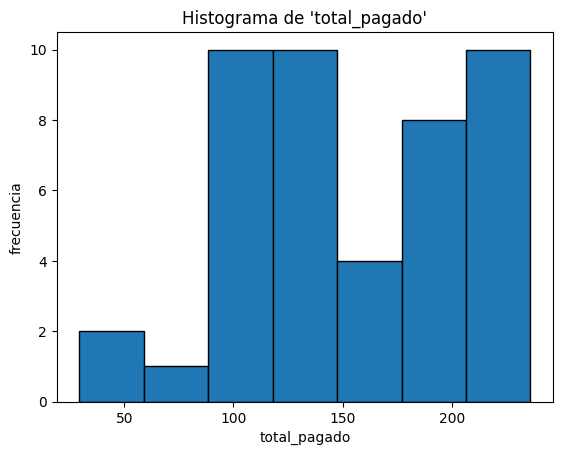

In [51]:
# obtenemos frecuencias relativas de la variable
frecuencia_total_pagado = df_aux['total_pagado'].value_counts(normalize=True).sort_index()

# creamos un histograma para la visualizar las frecuencias absolutas de la variable precio
plt.hist(df_aux['total_pagado'], bins=7, edgecolor='black')  # Ajustar bins según sea necesario
plt.title("Histograma de 'total_pagado'")
plt.xlabel('total_pagado')
plt.ylabel('frecuencia')
plt.show()

##### Medidas de centralización

No agruparemos los datos de la variable en tramos debido a la baja cantidad de observaciones, y para obtener los resultados con la mayor precisión posible.

In [25]:
# encontramos media 
media = df_aux['total_pagado'].mean()
print(media)

147.30888888888887


In [26]:
# encontramos mediana
mediana = df_aux['total_pagado'].median()
print(mediana)

135.0


In [27]:
# encontramos las modas
modas = df_aux['total_pagado'].mode()
print(modas)

0    118.0
1    236.0
Name: total_pagado, dtype: float64


Visualizamos los valores de concentración en el histograma de frecuencias anterior.

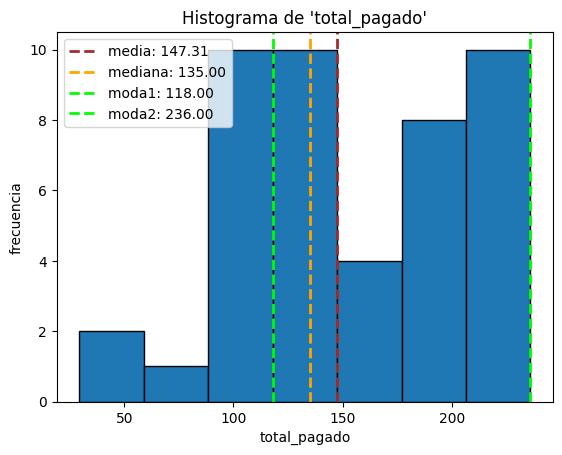

In [71]:
# creamos un histograma para la visualizar las frecuencias absolutas de la variable precio
plt.hist(df_aux['total_pagado'], bins=7, edgecolor='black')  # Ajustar bins según sea necesario
plt.title("Histograma de 'total_pagado'")
plt.xlabel('total_pagado')
plt.ylabel('frecuencia')
plt.axvline(media, color='brown', linestyle='dashed', linewidth=2, label=f'media: {media:.2f}')
plt.axvline(mediana, color='orange', linestyle='dashed', linewidth=2, label=f'mediana: {mediana:.2f}')
plt.axvline(modas[1], color='lime', linestyle='dashed', linewidth=2, label=f'moda1: {modas[0]:.2f}')
plt.axvline(modas[0], color='lime', linestyle='dashed', linewidth=2, label=f'moda2: {modas[1]:.2f}')
# Añadir una leyenda
plt.legend()
plt.show()



Podemos observar que la *media* es ligeramente mas alta que la *mediana* con valores de *147.3 euros* y *135.0 euros* respectivamente. Debido a la sensibilidad de la media respecto a valores extremos esta diferencia probablemente exprese un desbalance hacia arriba de los datos, que lleven la media a elevarse.

A su vez podemos ver que tenemos dos modas: 118.0 euros y 236.0 euros, ambas con 8 ocurrencias. Esto quiere decir que son los importes pagados con mayor frecuencia. Casualmente 236.0 es un valor alejado en 101 euros de la mediana, explicando una de las razones por la que la media es más elevada que la mediana.

##### Medidas de disperción

In [ ]:
# encontramos minimo y maximo
min = df_org['total_pagado'].min()
max = df_org['total_pagado'].max()
print(min)
print(max)

29.5
236.0


In [ ]:
# encontramos varianza 
var = df_org['total_pagado'].var()
print(var)

3356.593555555555


In [ ]:
# encontramos desviacion standard
std = df_org['total_pagado'].std()
print(std)

57.93611615871015


Obtenemos Coeficiente de Variación de Sperman, utilizando la siguiente definición:
$$
\begin{align*}
CV = \frac{\sigma}{\overline{x}}
\end{align*}
$$

In [ ]:
cv = std / media
print(cv)

0.39329681050279186


Vemos que la variable tiene un *recorrido de 206.5 euros*, que va de 29.5 a 236.5 euros. A su vez obtenemos un valor de *varianza de 3356.59*. Para ayudar en la interpretación obtenemos el valor de *desviación estandar de 57.9 euros*, que para una muestra con *media de 147.3 euros* expresa variabilidad moderada.

Para facilitar la interpretación de la variable, utilizamos el Coeficiente de Variación de Sperman, que pondera el valor de la desviación estandar, sobre el valor medio de la muestra. Esta medida de disperción no da un 39%, y como es menor a un 80%, podemos decir que la media aritmética es representativa de la muestra, y por lo tanto el conjunto de datos es homogeneo.

##### Medidas de posición

In [ ]:
# obtenemos Q1 y Q3
q1 = df_org['total_pagado'].quantile(0.25)
q3 = df_org['total_pagado'].quantile(0.75)

# obtenemos rango intercuartílico
rq = q3 - q1

print(rq)

81.0


In [ ]:
# obtenemos decil primero
d1 = df_org['total_pagado'].quantile(0.10)
print(d1)

88.5


In [ ]:
# obtenemos percentil 90
p1 = df_org['total_pagado'].quantile(0.90)
print(p1)

236.0


##### Medidas de concentración y forma